In [1]:
library(Seurat)
library(tidyverse)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [32]:
list.dirs("/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs/")

[1] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs/"                                                                                    
 [2] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//multi"                                                                              
 [3] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//multi/count"                                                                        
 [4] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//multi/count/raw_feature_bc_matrix"                                                  
 [5] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//multi/multiplexing_analysis"                                                        
 [6] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs"                                                                    
 [7] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat"                                                             
 [8] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count"                                                       
 [9] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis"                                              
[10] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering"                                   
[11] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_graphclust"        
[12] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_10_clusters"
[13] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_2_clusters" 
[14] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_3_clusters" 
[15] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_4_clusters" 
[16] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_5_clusters" 
[17] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_6_clusters" 
[18] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_7_clusters" 
[19] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_8_clusters" 
[20] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/clustering/gene_expression_kmeans_9_clusters" 
[21] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count/analysis/diffexp"                                      
[22] "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/i

In [34]:
list.files("/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs//per_sample_outs/Jurkat/count")

[1] "analysis"                            
[2] "feature_reference.csv"               
[3] "sample_alignments.bam"               
[4] "sample_alignments.bam.bai"           
[5] "sample_cloupe.cloupe"                
[6] "sample_filtered_barcodes.csv"        
[7] "sample_filtered_feature_bc_matrix"   
[8] "sample_filtered_feature_bc_matrix.h5"
[9] "sample_molecule_info.h5"

In [35]:
Jurkat_10X <- Read10X(data.dir = "/data1/Data/ExampleData/SC3_v3_NextGem_DI_CellPlex_Jurkat_Raji_10K/inputs/Jurkat_Raji_10K/outs/per_sample_outs/Jurkat/count/sample_filtered_feature_bc_matrix")

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [44]:
names(Jurkat_10X)
dim(Jurkat_10X$`Gene Expression`)
dim(Jurkat_10X$`Multiplexing Capture`)

[1] "Gene Expression"      "Multiplexing Capture"

[1] 38606  5900

[1]   12 5900

In [51]:
dim(Sobj@assays$RNA@layers$counts)

[1] 25600    52

In [64]:
Sobj <- CreateSeuratObject(counts = Jurkat_10X$`Gene Expression`, project = "10Xmulti")

In [65]:
Sobj

An object of class Seurat 
38606 features across 5900 samples within 1 assay 
Active assay: RNA (38606 features, 0 variable features)
 1 layer present: counts

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


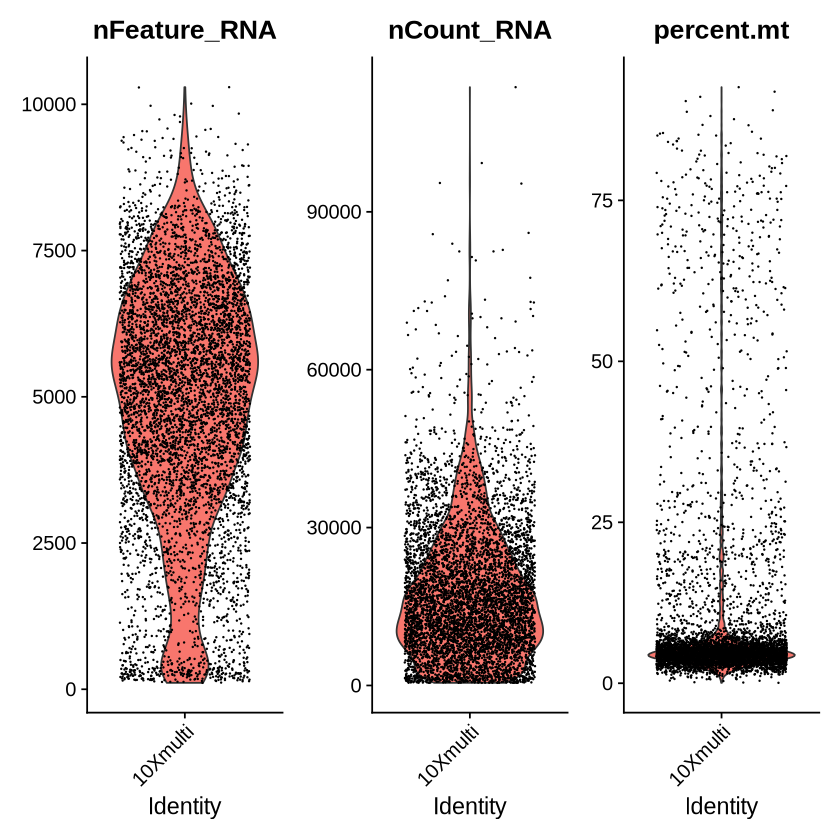

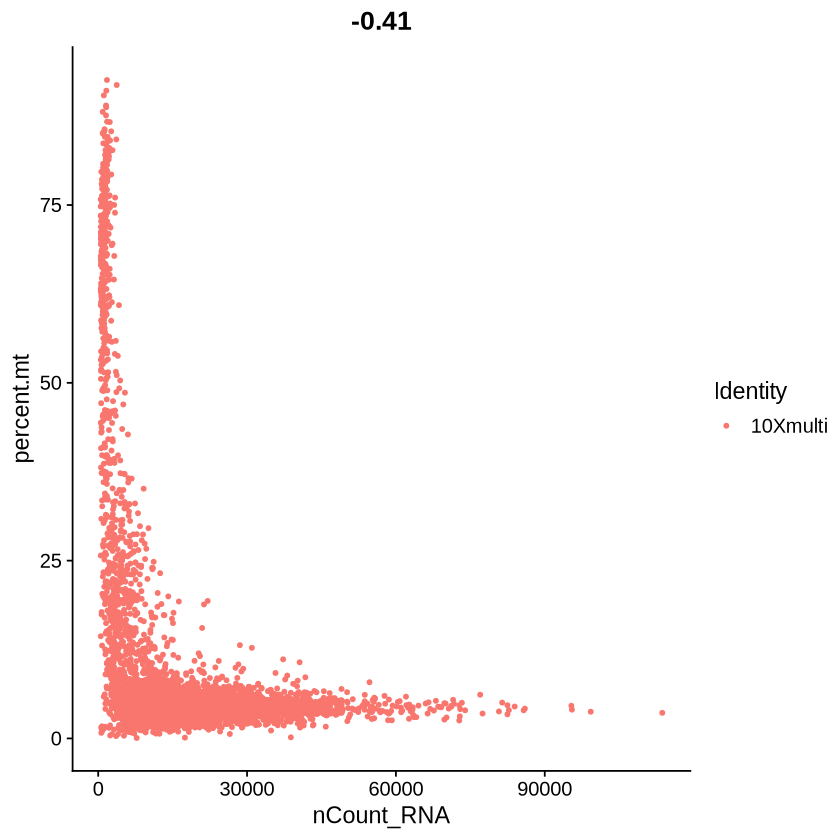

Normalizing layer: counts

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  UBE2S, NME2, RPS4Y1, GYPC, PTTG1, EIF1AY, HSPA8, IL32, CD99, FXYD2 
	   HES4, CKS2, CKS1B, CTSG, SLC35F1, JPT1, CDC20, TUBB4B, TUBB, CCNB1 
	   MZB1, BST2, TXLNGY, FDPS, CDKN3, CCNB2, FTL, BIRC5, MYC, SNHG3 
Negative:  SSBP2, SOX5, PDE3B, TCF12, ZEB1, ARHGAP15, DPYD, MALAT1, AFF2, TTC28 
	   MIR181A1HG, DST, TOX, PELI2, THEMIS, NEXMIF, ZC3H12B, GPHN, DIAPH3, EPHA3 
	   SAMD12, SCN3A, HDAC4, ENSG00000242029, ITGA4, LINC01163, WWOX, LEF1, IKZF2, TNIK 
PC_ 2 
Positive:  FBXL20, DTL, UNG, POLA1, KSR2, FAM111B, TIAM1, BICDL1, ZFHX3, ASAP2 
	   IMMP2L, CCNE2, RNF150, GABRB3, GALNT18, ANO5, CTDSPL, SERINC5, CAMK1D, ZDHHC14 
	   IGF1R, OSBP2, LINC01036, DOCK3, MIR646HG, ST6GAL1, CDH4, PRKCB, ZC3H12B, ZC4H2 
Negative:  TOP2A, CENPE, TPX2, HMGB2, CDK1, ASPM, UBE2C, KPNA2, GTSE1, NUSAP1 
	   CENPF, AURKA, PLK1, AURKB, PRR11, DLGAP5, MKI67, CCNA2, C

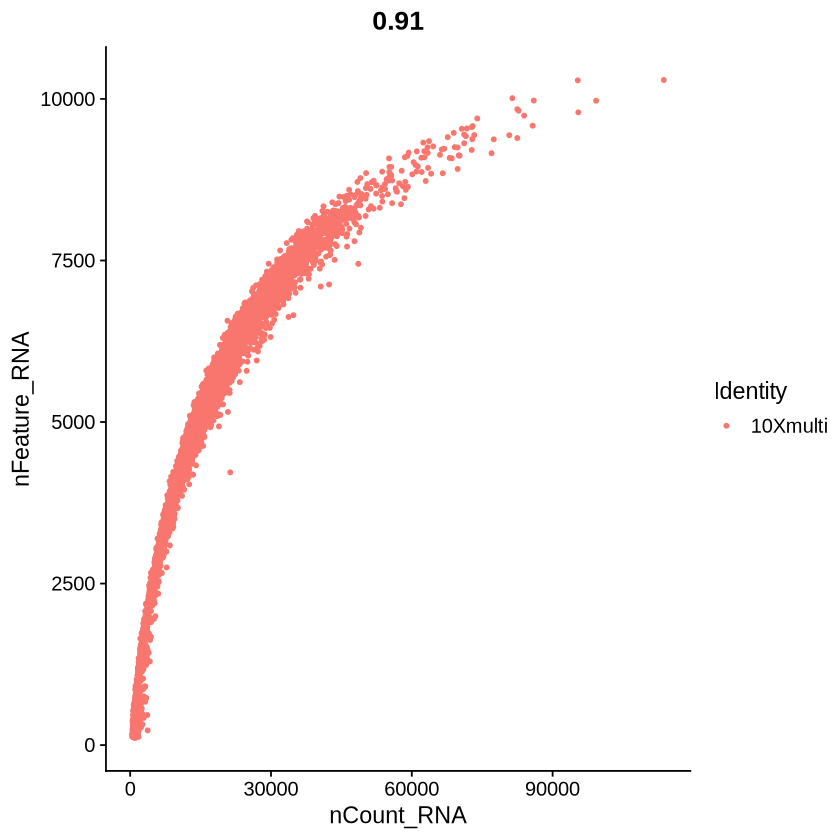

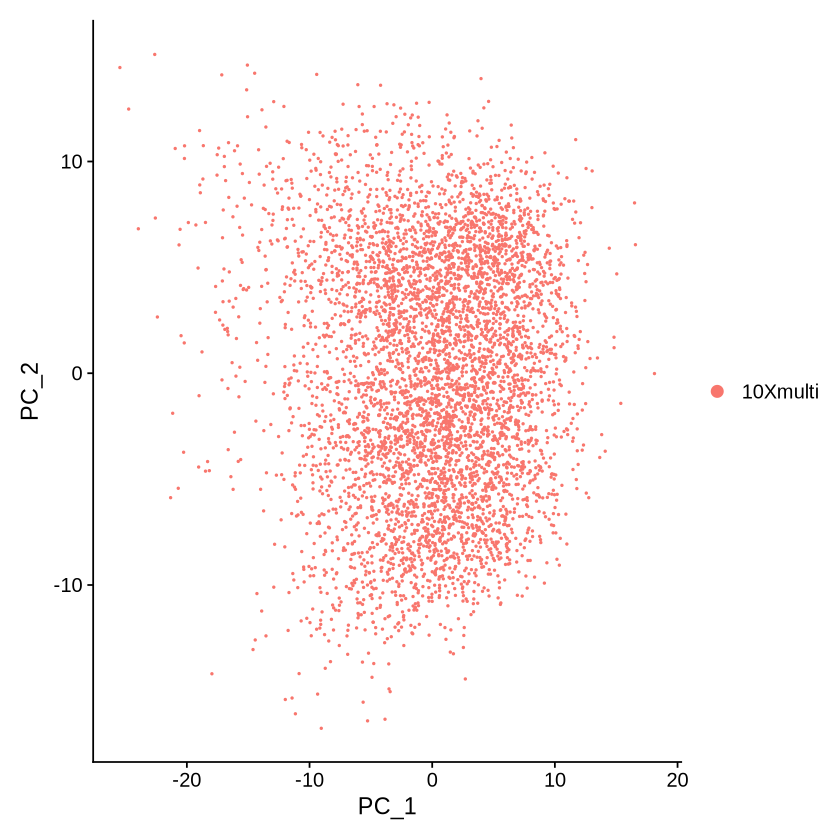

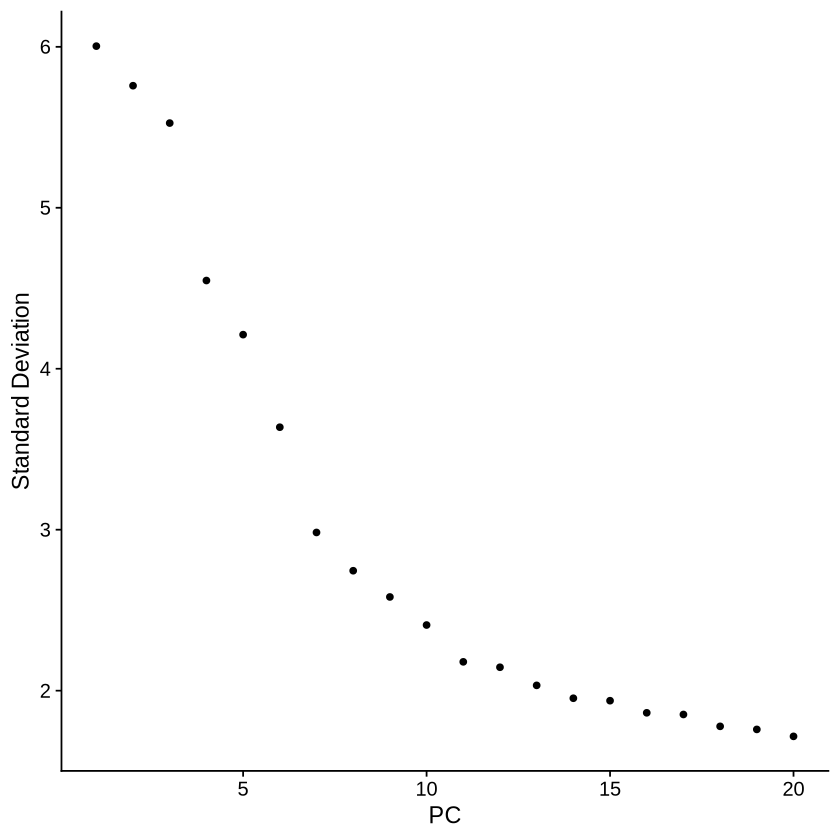

In [66]:
## QC visualization
Sobj[["percent.mt"]] <- PercentageFeatureSet(Sobj, pattern = "^MT-")
VlnPlot(Sobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
FeatureScatter(Sobj, feature1 = "nCount_RNA", feature2 = "percent.mt")
FeatureScatter(Sobj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
## Remove low quality cells, 
Sobj <- subset(Sobj, subset = nFeature_RNA > 200 & nFeature_RNA < 10000 & percent.mt < 25)

# 3. Data normalization
## Normalize based on the assumption that each cell originally contains the same number of RNA molecules. Otherwise use SCTransform()
Sobj <- NormalizeData(Sobj, normalization.method = "LogNormalize", scale.factor = 10000)
Sobj <- NormalizeData(Sobj)
## Feature selection to reduce data dimensionality
Sobj <- FindVariableFeatures(Sobj, selection.method = "vst", nfeatures = 2000)
Sobj <- ScaleData(Sobj, features = VariableFeatures(Sobj))

# 4. Dimension reduction
Sobj <- RunPCA(Sobj, features = VariableFeatures(object = Sobj), npcs = 50)
DimPlot(Sobj, reduction = "pca")
## Chose number of PCs for downstream analysis based on major standadr deviation change in elbow plot
ElbowPlot(Sobj)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5403
Number of edges: 187395

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8327
Number of communities: 8
Elapsed time: 0 seconds


14:15:01 UMAP embedding parameters a = 0.9922 b = 1.112

14:15:01 Read 5403 rows and found 10 numeric columns

14:15:01 Using Annoy for neighbor search, n_neighbors = 30

14:15:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:15:01 Writing NN index file to temp file /tmp/RtmpICRcbH/file37b4ca2aee0335

14:15:01 Searching Annoy index using 1 thread, search_k = 3000

14:15:03 Annoy recall = 100%

14:15:03 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:15:05 Initializing from normalized Laplacian + noise (using RSpectra)

14:15:05 Commencing optimization for 500 epochs, with 206842 positive edges

14:15:12 Optimization finished



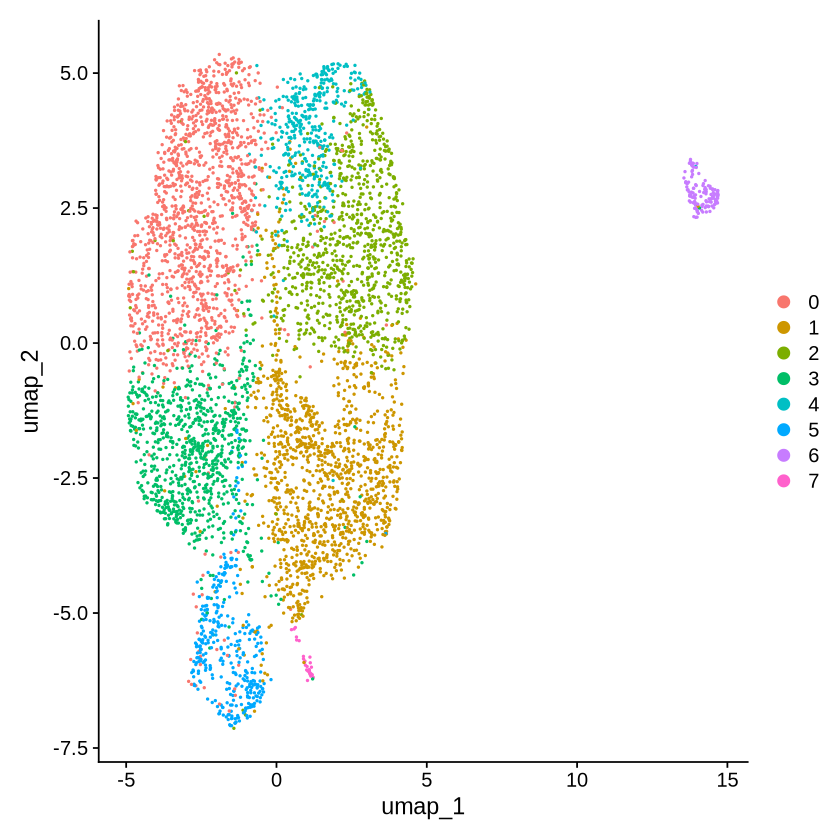

In [67]:
# 5. Cells clustering
## Use Louvain algorithm to iteratively group cells together
Sobj <- FindNeighbors(Sobj, dims = 1:20)
## Decide the granularity of cell clustering. Higher resolution value leads to more coarse clustering result.
Sobj <- FindClusters(Sobj, resolution = 0.5)
## Visualization of clustering result based on UMAP algorithm
Sobj <- RunUMAP(Sobj, dims = 1:10)
DimPlot(Sobj, reduction = "umap")

In [ ]:
# 6. DEG analysis
## Analyze the differential expressed genes in all clusters
Sobj.markers <- FindAllMarkers(Sobj, only.pos = TRUE)

In [69]:
Sobj.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10

In [ ]:
options(repr.width = 20, repr.height = 10)
VlnPlot(Sobj, features = top10$gene[1:6], ncol = 3)

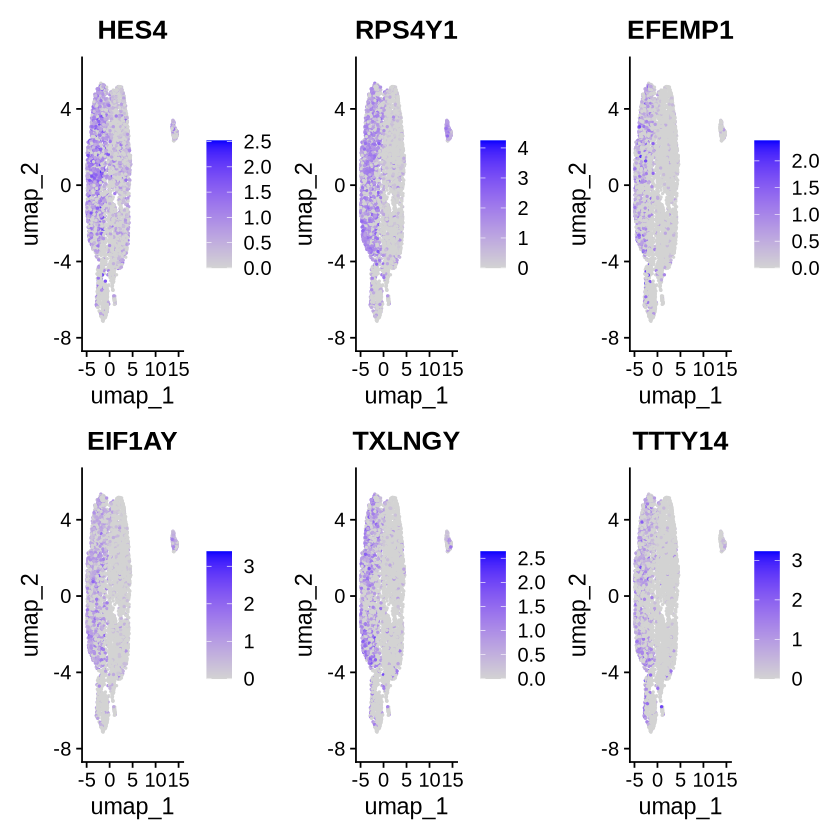

In [83]:
FeaturePlot(Sobj, features = top10$gene[1:6], ncol = 3)